In [263]:
# 2.
import numpy as np 
import matplotlib as plt 
from math import sqrt
import colorcet as cc 
from numpy.linalg import norm, inv

#first define our function and stuff 

def LJ_potential(r):
    '''
    return the values of Lennard-Jones potential 
    '''
    return 4*((1/r)**12 - (1/r)**6)
    
def total_energy(X): #in this case x is a m by 2 list with all the values 
    '''
    total energy of the system 
    '''
    sum = 0 
    for i in range(0,m): 
        for j in range(0,m): 
            if (i != j):
                #print("Currently at:", i, " and ", j)
                potential = LJ_potential(distance(X[i][0], X[i][1], X[j][0], X[j][1]))
                sum += potential 
    return sum 

def distance(xi,xj,yi,yj):  #return the distance between two points 
    '''
    distance between two arbitrary points 
    '''
    return sqrt((xj - xi)**2 + (yj - yi)**2)


def backtracking(alpha, x, direction):
    '''
    Backtracking algorithm
    '''
    xn = x
    Fn = total_energy(x) # Function value of previous iteration 
    #print("This is direction in backtracking")
    #print(direction)
    for i in range(0,len(x)):
        xn_1 = x[i][0] + alpha*direction[0,0] # possible update for x and y
        yn_1 = x[i][1] + alpha*direction[1,0] 
        xn[i][0] = xn_1
        xn[i][1] = yn_1 
        
    Fn_1 = total_energy(xn) #function value of the possible update 
    
    while Fn < Fn_1: 
        # we need to find an alpha for backtracking 
        print("Fn",Fn) 
        print("Fn_1",Fn_1)
        
        alpha = alpha*beta 
            
        for i in range(0,len(x)):
            xn_1 = x[i][0] + alpha*direction[0,0] # possible update for x and y
            yn_1 = x[i][1] + alpha*direction[1,0] 
            xn[i][0] = xn_1
            xn[i][1] = yn_1 
        Fn_1 = total_energy(xn)
        
        if (alpha < tol):
            alpha = alpha * -1
            alpha = alpha*beta 

            for i in range(0,len(x)):
                xn_1 = x[i][0] + alpha*direction[0,0] # possible update for x and y
                yn_1 = x[i][1] + alpha*direction[1,0] 
                xn[i][0] = xn_1
                xn[i][1] = yn_1 
            Fn_1 = total_energy(xn)

    return alpha 

def grad_Vx(xn,i): #xn is the points that we have, x is the x value we're differentiating w respect to
    '''
    Calculate dV/dxi. Note the input is x for all the points we have and i for which xi or yi we're taking the gradient w respect to
    '''
    sum = 0
    length = len(xn)
    for j in range(0,length): #differentiating it with respect to xi 
        if (i != j):
            xi = xn[i][0] #fix this point 
            xj = xn[j][0]
            yi = xn[i][1]
            yj = xn[j][1]
            r = distance(xi,xj,yi,yj) #define distance 
            sum += 48 * (xj - xi)/(r**14) - 24 * (xj - xi)/(r**8) 
    for j in range(0,length): #differentiating it with respect to xj
        if (i != j):
            xi = xn[j][0]
            xj = xn[i][0] #fix this point 
            yi = xn[i][1]
            yj = xn[j][1]
            r = distance(xi,xj,yi,yj) #define distance 
            sum += - 48 * (xj - xi)/(r**14) + 24 * (xj - xi)/(r**8) 
    return sum

def grad_Vy(xn,i):
    '''
    Calculate dV/dyi. Note the input is y for the value of y we're differenting w respect to
    '''
    sum = 0
    length = len(xn) 
    for j in range(0,length):
        if (i != j):
            xi = xn[i][0]
            xj = xn[j][0]
            yi = xn[i][1] #fix this point 
            yj = xn[j][1]
            r = distance(xi,xj,yi,yj) #define distance 
            sum += 48 * (yj - yi)/(r**14) - 24 * (yj - yi)/(r**8)  
    for j in range(0,length):
        if (i != j):
            xi = xn[j][0]
            xj = xn[i][0] 
            yi = xn[j][1]
            yj = xn[i][1] #fix this point 
            r = distance(xi,xj,yi,yj) #define distance 
            sum += - 48 * (xj - xi)/(r**14) + 24 * (xj - xi)/(r**8) 
    return sum 

def grad_f(x): 
    '''
    calculate the gradient of the cost function 
    '''
    grad = np.zeros((len(x),2)) #change this when finished with equation 
    xn = x 
    for i in range(0,len(xn)): 
            grad[i][0] = grad_Vx(xn,i) # input xn, the x point we're differentiating w respect to, and i
            grad[i][1] = grad_Vy(xn,i) # input yn, the y point we're differentiating w respect to, and i
    return grad 

def Grad_desc_LJ(X):
    '''
    Function that uses grad descent to minimize the cost function of LJ potential 
    '''
    xn = X
    F_vec = [total_energy(xn)] 
    i = 0 
    d = -grad_f(xn)
    while (norm(d) >= tol and i < maxIter):
        d = -grad_f(xn)
        alpha = backtracking(alpha0, xn, d)
        xn = xn + alpha*d
        F_vec.append(total_energy(xn))
        i += 1
    return xn, F_vec, i
    
    


In [264]:
m = 10 #define the number of points. Change this to change the function 

#define some more variables 
maxIter = 1000
alpha0 = 1
beta = 0.8
tol = 1e-12

X = np.random.randn(m, 2)
# some points you can use to test 

# X = [[-0.22319621,-1.38543596],[ 0.02120013, -0.59496853],
#  [-1.46643572, -1.14389915],
#  [-0.46902538,  0.5279463 ],
#  [-0.41056459,  1.04019638],
#  [-0.10206865, -2.67005715]]

# X = [[-0.28615611,-0.87826496],
#  [ 0.297685  ,-0.41110151],
#  [-0.33634252 , 0.03718838],
#  [ 0.16467781 ,-0.53916569],
#  [-1.31079889 , 1.59503456],
#  [ 1.97059601 , 0.03835915]]

# X = [[ 1.05381243, -0.20617839],
#  [ 0.59928854,  0.45016196],
#  [ 0.51308778, -0.14200706],
#  [ 0.32532911, -1.21243611],
#  [-1.16844047,  0.23647549],
#  [ 0.24781722, -0.5167744 ],
#  [-0.88003949,  1.02674326],
#  [ 1.47782335, -1.6067287 ],
#  [-0.96211852, -2.03110364],
#  [-0.38659572, -0.28558829]]
print(X)
 
# we want to develop an algorithm for minimizing f using BFGS 

xn, F_vec, i = Grad_desc_LJ(X)
print("xn vector: ", xn)
print("Fn vector: ", F_vec)
print("iterations: ", i)

[[-1.29236699  0.27904129]
 [ 0.2017179   1.06578018]
 [ 0.08129662 -1.22251943]
 [ 1.040692    0.80561563]
 [-1.35633759 -0.36075772]
 [ 3.00185268 -1.17079385]
 [ 0.61176916 -0.69554155]
 [-0.58175676  2.06784001]
 [-0.25122867  1.21838161]
 [ 0.89194093  0.48417534]]
xn vector:  [[ 5.74602905e+03  1.34630568e+06]
 [ 1.33339234e+06  1.77169411e+06]
 [ 1.51659849e+02  1.32780545e+06]
 [ 2.91768384e+07  4.74384445e+07]
 [ 4.97677788e+00  1.31473581e+06]
 [ 2.87647090e+03  1.33051725e+06]
 [ 5.59626528e+03  1.33323408e+06]
 [ 2.79335292e+03  1.33058482e+06]
 [-1.32814603e+06  8.89130851e+05]
 [-2.91705146e+07 -4.47772653e+07]]
Fn vector:  [66946.46768144991, -9.38962238194121e-36, -9.38962238194121e-36]
iterations:  2


[[   2872.36833991 1330518.75781298]
 [   2873.8624248  1330519.54455188]
 [   2873.74200352 1330517.25625227]
 [   2874.7013989  1330519.28438732]
 [   2872.30436931 1330518.11801398]
 [   2876.66255957 1330517.30797785]
 [   2874.27247605 1330517.78323014]
 [   2873.07895013 1330520.5466117 ]
 [   2873.40947823 1330519.69715331]
 [   2874.55264782 1330518.96294704]]


<function matplotlib.pyplot.show(close=None, block=None)>

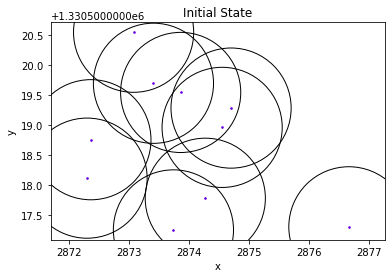

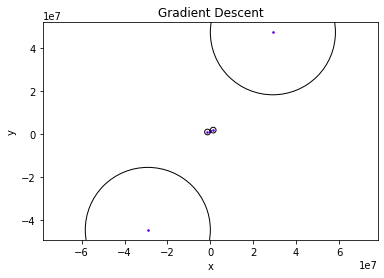

In [265]:
# import numpy as np 
import matplotlib.pyplot as plt
import colorcet as cc
from numpy.linalg import norm, inv

print(X)

#plotting the original function 
figure, axes = plt.subplots()
plt.title('Initial State') 
for i in range(0,m):
    plt.scatter(X[i][0],X[i][1], s=10,c="#6800e6", marker=".") 
    circle = plt.Circle((X[i][0], X[i][1]), 1, fill = False)
    axes.add_artist(circle) 
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')



#this is for gradent descent 
figure,axes = plt.subplots() 
plt.title('Gradient Descent') 
for i in range(0,m):
    plt.scatter(xn[i][0],xn[i][1], s=10,c="#6800e6", marker=".") 
    circle = plt.Circle((xn[i][0], xn[i][1]), 1*xn[i][0], fill = False)
    axes.add_artist(circle) 
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show

In [250]:
# 3. 
# Question 1 and 2
import numpy as np 
import matplotlib.pyplot as plt 
from math import sqrt
import colorcet as cc 
from numpy.linalg import norm, inv

def c(x,y):  
    '''
    return the function for particle speed 
    '''
    return 1+(4-3*x-y)**(1/2)

def c_level(x,y):
    '''
    need to use numpy to help graph our contours 
    '''
    a = np.subtract(4,3*x)
    return 1+np.power( np.subtract(a,y),0.5)

def distance(x,y):  #return the norm of r'(t) 
    '''
    norm of point
    '''
    return sqrt(x**2 + y**2)

In [258]:
def value_at_point(r,i):
    '''
    calculate the value of the quadrature function at i
    '''
    f_t_1=(((r[i][0]-r[i-1][0])**2+(r[i][1]-r[i-1][1])**2)**(1/2)/(c(r[i-1][0],r[i-1][1])+c(r[i][0],r[i][1])))/2
    f_t  =(((r[i+1][0]-r[i][0])**2+(r[i+1][1]-r[i][1])**2)**(1/2)/(c(r[i][0],r[i][1])+c(r[i+1][0],r[i+1][1])))/2
    return f_t_1+f_t

def grad_quad(X,i):
    '''
    gradient of quadrature at a point 
    '''
    grad = np.zeros((2,1))
    x_0 = X[i-1][0]
    x_1 = X[i][0] 
    
    y_0 = X[i-1][1]
    y_1 = X[i][1] 

    grad[0] = (3*sqrt((x_1-x_0)**2+(y_1-y_0)**2))/((sqrt(-3*x_1-y_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*sqrt(-3*x_1-y_1+4))+(2*(x_1-x_0))/((sqrt(-3*x_1-y_1+4)+sqrt(-y_0-3*x_0+4)+2)*sqrt((x_1-x_0)**2+(y_1-y_0)**2))
    grad[1] = sqrt((y_1-y_0)**2+(x_1-x_0)**2)/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*sqrt(-y_1-3*x_1+4))+(2*(y_1-y_0))/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)*sqrt((y_1-y_0)**2+(x_1-x_0)**2))
    
    x_0 = X[i+1][0]
    y_0 = X[i+1][1]

    grad[0] = grad[0] + (3*sqrt((x_1-x_0)**2+(y_1-y_0)**2))/((sqrt(-3*x_1-y_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*sqrt(-3*x_1-y_1+4))+(2*(x_1-x_0))/((sqrt(-3*x_1-y_1+4)+sqrt(-y_0-3*x_0+4)+2)*sqrt((x_1-x_0)**2+(y_1-y_0)**2))
    grad[1] = grad[1] + sqrt((y_1-y_0)**2+(x_1-x_0)**2)/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*sqrt(-y_1-3*x_1+4))+(2*(y_1-y_0))/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)*sqrt((y_1-y_0)**2+(x_1-x_0)**2))
    
    
    return grad 

def quadrature(X):
    '''
    total value of function with quadrature rule 
    '''
    sum = 0 
    for i in range(1,n):
        sum += (((X[i][0]-X[i-1][0])**2+(X[i][1]-X[i-1][1])**2)**(1/2)/(c(X[i-1][0],X[i-1][1])+c(X[i][0],X[i][1])))/2
    return sum 

def backTr(alpha, X, i, direction):
    '''
    Backtracking algorithm (Need to revise the fact that i might of inputted a wrong direction)
    '''
    tol = 1e-6
    Xn = X.copy()
    Fn = value_at_point(X,i) # function value of previous iteration
    Fn_1 = 10 
    while Fn < Fn_1:
        alpha = alpha*beta
        a = X[i][0] + alpha*direction[0,0]
        b = X[i][1] + alpha*direction[1,0]
        if (a>0 and a<1 and b>0 and b<1):
            Xn[i][0] = X[i][0] + alpha*direction[0,0]
            Xn[i][1] = X[i][1] + alpha*direction[1,0]
            Fn_1 = value_at_point(Xn,i) # function value of possible next iteration
        if (alpha < tol):
            return 0 
    return alpha

def Hess_point(X, i):
    '''
    Hessian at a point ti
    '''
    Hess = np.zeros((2,2))
    
    x_0 = X[i-1][0]
    x_1 = X[i][0]
    
    y_0 = X[i-1][1]  
    y_1 = X[i][1]
    
    Hess[0,0] = (9*sqrt((x_1-x_0)**2+(y_1-y_0)**2))/((sqrt(-3*x_1-y_1+4)+sqrt(-y_0-3*x_0+4)+2)**3*(-3*x_1-y_1+4))+(9*sqrt((x_1-x_0)**2+(y_1-y_0)**2))/(2*(sqrt(-3*x_1-y_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*(-3*x_1-y_1+4)**(3/2))+(6*(x_1-x_0))/((sqrt(-3*x_1-y_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*sqrt(-3*x_1-y_1+4)*sqrt((x_1-x_0)**2+(y_1-y_0)**2))+2/((sqrt(-3*x_1-y_1+4)+sqrt(-y_0-3*x_0+4)+2)*sqrt((x_1-x_0)**2+(y_1-y_0)**2))-(2*(x_1-x_0)**2)/((sqrt(-3*x_1-y_1+4)+sqrt(-y_0-3*x_0+4)+2)*((x_1-x_0)**2+(y_1-y_0)**2)**(3/2))
    Hess[0,1] = (3*sqrt((y_1-y_0)**2+(x_1-x_0)**2))/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**3*(-y_1-3*x_1+4))+(3*sqrt((y_1-y_0)**2+(x_1-x_0)**2))/(2*(sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*(-y_1-3*x_1+4)**(3/2))+(3*(y_1-y_0))/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*sqrt(-y_1-3*x_1+4)*sqrt((y_1-y_0)**2+(x_1-x_0)**2))+(x_1-x_0)/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*sqrt(-y_1-3*x_1+4)*sqrt((y_1-y_0)**2+(x_1-x_0)**2))-(2*(x_1-x_0)*(y_1-y_0))/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)*((y_1-y_0)**2+(x_1-x_0)**2)**(3/2))
    Hess[1,0] = (3*sqrt((y_1-y_0)**2+(x_1-x_0)**2))/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**3*(-y_1-3*x_1+4))+(3*sqrt((y_1-y_0)**2+(x_1-x_0)**2))/(2*(sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*(-y_1-3*x_1+4)**(3/2))+(3*(y_1-y_0))/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*sqrt(-y_1-3*x_1+4)*sqrt((y_1-y_0)**2+(x_1-x_0)**2))+(x_1-x_0)/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*sqrt(-y_1-3*x_1+4)*sqrt((y_1-y_0)**2+(x_1-x_0)**2))-(2*(x_1-x_0)*(y_1-y_0))/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)*((y_1-y_0)**2+(x_1-x_0)**2)**(3/2))
    Hess[1,1] = sqrt((y_1-y_0)**2+(x_1-x_0)**2)/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**3*(-y_1-3*x_1+4))+sqrt((y_1-y_0)**2+(x_1-x_0)**2)/(2*(sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*(-y_1-3*x_1+4)**(3/2))+(2*(y_1-y_0))/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*sqrt(-y_1-3*x_1+4)*sqrt((y_1-y_0)**2+(x_1-x_0)**2))+2/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)*sqrt((y_1-y_0)**2+(x_1-x_0)**2))-(2*(y_1-y_0)**2)/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)*((y_1-y_0)**2+(x_1-x_0)**2)**(3/2))
    
    x_0 = X[i+1][0]
    y_0 = X[i+1][1]
    
    Hess[0,0] += (9*sqrt((x_1-x_0)**2+(y_1-y_0)**2))/((sqrt(-3*x_1-y_1+4)+sqrt(-y_0-3*x_0+4)+2)**3*(-3*x_1-y_1+4))+(9*sqrt((x_1-x_0)**2+(y_1-y_0)**2))/(2*(sqrt(-3*x_1-y_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*(-3*x_1-y_1+4)**(3/2))+(6*(x_1-x_0))/((sqrt(-3*x_1-y_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*sqrt(-3*x_1-y_1+4)*sqrt((x_1-x_0)**2+(y_1-y_0)**2))+2/((sqrt(-3*x_1-y_1+4)+sqrt(-y_0-3*x_0+4)+2)*sqrt((x_1-x_0)**2+(y_1-y_0)**2))-(2*(x_1-x_0)**2)/((sqrt(-3*x_1-y_1+4)+sqrt(-y_0-3*x_0+4)+2)*((x_1-x_0)**2+(y_1-y_0)**2)**(3/2))
    Hess[0,1] += (3*sqrt((y_1-y_0)**2+(x_1-x_0)**2))/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**3*(-y_1-3*x_1+4))+(3*sqrt((y_1-y_0)**2+(x_1-x_0)**2))/(2*(sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*(-y_1-3*x_1+4)**(3/2))+(3*(y_1-y_0))/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*sqrt(-y_1-3*x_1+4)*sqrt((y_1-y_0)**2+(x_1-x_0)**2))+(x_1-x_0)/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*sqrt(-y_1-3*x_1+4)*sqrt((y_1-y_0)**2+(x_1-x_0)**2))-(2*(x_1-x_0)*(y_1-y_0))/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)*((y_1-y_0)**2+(x_1-x_0)**2)**(3/2))
    Hess[1,0] += (3*sqrt((y_1-y_0)**2+(x_1-x_0)**2))/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**3*(-y_1-3*x_1+4))+(3*sqrt((y_1-y_0)**2+(x_1-x_0)**2))/(2*(sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*(-y_1-3*x_1+4)**(3/2))+(3*(y_1-y_0))/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*sqrt(-y_1-3*x_1+4)*sqrt((y_1-y_0)**2+(x_1-x_0)**2))+(x_1-x_0)/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*sqrt(-y_1-3*x_1+4)*sqrt((y_1-y_0)**2+(x_1-x_0)**2))-(2*(x_1-x_0)*(y_1-y_0))/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)*((y_1-y_0)**2+(x_1-x_0)**2)**(3/2))
    Hess[1,1] += sqrt((y_1-y_0)**2+(x_1-x_0)**2)/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**3*(-y_1-3*x_1+4))+sqrt((y_1-y_0)**2+(x_1-x_0)**2)/(2*(sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*(-y_1-3*x_1+4)**(3/2))+(2*(y_1-y_0))/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)**2*sqrt(-y_1-3*x_1+4)*sqrt((y_1-y_0)**2+(x_1-x_0)**2))+2/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)*sqrt((y_1-y_0)**2+(x_1-x_0)**2))-(2*(y_1-y_0)**2)/((sqrt(-y_1-3*x_1+4)+sqrt(-y_0-3*x_0+4)+2)*((y_1-y_0)**2+(x_1-x_0)**2)**(3/2))
    
    return Hess


In [252]:
def steepDesc_pt(X,i):
    '''
    Function that minimizes the quadature function
    in free space using the steepest descent direction
    
    done at point i, suppose to iterate for all i
    '''
    Xn = X
    iteration = 0
    d = -grad_quad(Xn,i)
    while( norm(d) >= tol and iteration < maxIter ):
        d = -grad_quad(Xn,i)
        alpha = backTr(alpha0,Xn,i,d)
        Xn[i][0] = Xn[i][0] + alpha*d[0][0]
        Xn[i][1] = Xn[i][1] + alpha*d[1][0]
        iteration += 1
    #print("Took", iteration," iterations for GD")
    return Xn 

def SteepDesc_quad(X,n):
    '''
    gradient descent with quadrature 
    '''
    F_vec = [quadrature(X)]
    iteration2 = 0
    Xn_SD = X.copy()
    while(1):
        for i in range(1,n):
            origin_X = Xn_SD.copy()
            Xn_SD = steepDesc_pt(Xn_SD,i)
            #
            iteration2 += 1 
            F_vec.append(quadrature(Xn_SD))
            #
        if(norm(np.subtract(origin_X,Xn_SD))<1e-4):
            break
    return Xn_SD, F_vec, iteration2

def sr1_pt(X, i, H0):
    '''
    Function that minimizes the quadature function
    in free space using the SR1 update to the INVERSE
    of the Hessian
    '''
    Xn = X
    iteration = 0
    g = -grad_quad(Xn,i)
    sk = np.ones(g.shape)
    Hk = H0
    frac = 1
    while( norm(g) >= tol and i < maxIter and norm(frac) >= tol and norm(1/frac)>=tol):
        d = -Hk@g # Direction on which we are going to move
        alpha = backTr(alpha0,Xn,i, d)
        Xn[i][0] = Xn[i][0] + alpha*d[0][0]
        Xn[i][1] = Xn[i][1] + alpha*d[1][0]
        gnew = grad_quad(Xn,i) # We need this to compute yk
        sk = alpha*d
        yk = gnew - g
        frac = (sk - Hk@yk).T@yk
        if(abs(frac)<1e-8 or abs(1/(frac))<1e-8):
            break
        Hk = Hk + (1/(frac)) * (sk - Hk@yk)@(sk - Hk@yk).T # SR1 formula
        g = gnew
        iteration += 1
    #print("Took", iteration," iterations for Sr1")
    return Xn 

def sr1_quad(X,n): 
    '''
    sr1 with quadrature 
    '''
    Xn_sr1 = X.copy()
    F_vec = [quadrature(X)]
    iteration2 = 0
    while(1):
        for i in range(1,n):
            B0 = Hess_point(Xn_sr1,i)
            H0 = inv(B0)
            origin_X = Xn_sr1.copy()
            Xn_sr1 = sr1_pt(Xn_sr1,i,H0)
            iteration2 += 1 
            F_vec.append(quadrature(Xn_sr1))
        if(norm(np.subtract(origin_X,Xn_sr1))<1e-8):
            break
            
    return Xn_sr1, F_vec, iteration2
        

def bfgs_pt(X,i,H0):
    '''
    Function that minimizes the Rosenbrock function
    in free space using the BFGS update to the INVERSE
    of the Hessian
    '''
    Xn = X
    iteration = 0
    g = grad_quad(Xn,i)
    sk = np.ones(g.shape) 
    Hk = H0 
    I = np.identity(2) # Useful to have for the BFGS update
    rho_inv = 1
    while( norm(g) >= tol and i < maxIter and norm(rho_inv) >= tol and norm(1/rho_inv)>=tol):
        d = -Hk@g # Direction on which we are going to move
        alpha = backTr(alpha0,Xn,i, d)
        Xn[i][0] = Xn[i][0] + alpha*d[0][0]
        Xn[i][1] = Xn[i][1] + alpha*d[1][0]
        gnew = grad_quad(Xn,i) # We need this to compute yk
        sk = alpha*d
        yk = gnew - g
        rho_inv = yk.T@sk
        if(abs(rho_inv)<1e-6 or abs(1/(rho_inv))<1e-6):
            break
        Hk = (I - 1/rho_inv*sk@yk.T)@Hk@(I - 1/rho_inv*yk@sk.T) + 1/rho_inv*sk@sk.T # BFGS formula
        g = gnew
        iteration += 1
    #print("Took", iteration," iteration for BFGS")
    return Xn

        
def bfgs_quad(X,n): 
    '''
    bfgs with quadrature 
    '''
    Xn_bfgs = X.copy()
    F_vec = [quadrature(X)]
    iteration2 = 0
    while(1):
        for i in range(1,n): 
            B0 = Hess_point(Xn_bfgs,i)
            H0 = inv(B0) 
            origin_X = Xn_bfgs.copy()
            Xn_bfgs = bfgs_pt(Xn_bfgs,i,H0)
            iteration2 += 1 
            F_vec.append(quadrature(Xn_bfgs))
        if(norm(np.subtract(origin_X,Xn_bfgs))<1e-6):
            break
    return Xn_bfgs, F_vec, iteration2


In [253]:
def graph_it(X):
    '''
    graph our findings along with contour 
    '''
    x = []
    y = [] 
    for i in X: 
        x.append(i[0])
        y.append(i[1]) 
    x_cont, y_cont = np.meshgrid( np.linspace(0,1,1000), np.linspace(0,1,1000))
    z = c_level(x_cont,y_cont)
        
    plt.figure(figsize = (5, 5))
    im = plt.contour(x_cont,y_cont,z,levels = 250, cmap = 'cet_linear_bmy_10_95_c78')
    plt.scatter(x,y) 
    for i in range(n):
        plt.plot([X[i][0],X[i+1][0]], [X[i][1],X[i+1][1]],'b')
    plt.axis('equal')
    plt.legend()
    plt.colorbar(im)
    plt.show


[[0.   0.  ]
 [0.05 0.05]
 [0.1  0.1 ]
 [0.15 0.15]
 [0.2  0.2 ]
 [0.25 0.25]
 [0.3  0.3 ]
 [0.35 0.35]
 [0.4  0.4 ]
 [0.45 0.45]
 [0.5  0.5 ]
 [0.55 0.55]
 [0.6  0.6 ]
 [0.65 0.65]
 [0.7  0.7 ]
 [0.75 0.75]
 [0.8  0.8 ]
 [0.85 0.85]
 [0.9  0.9 ]
 [0.95 0.95]
 [1.   1.  ]]
[[0.         0.        ]
 [0.05038231 0.0556628 ]
 [0.10008106 0.10994621]
 [0.14971602 0.16378069]
 [0.1997105  0.21787124]
 [0.25073049 0.27316864]
 [0.30441529 0.33160964]
 [0.36355774 0.39615653]
 [0.42994628 0.46832174]
 [0.50243859 0.54607289]
 [0.57810322 0.62535132]
 [0.65367296 0.70197339]
 [0.7261657  0.77252227]
 [0.79295412 0.83448204]
 [0.8518552  0.88629222]
 [0.90122828 0.92731448]
 [0.94015596 0.95779848]
 [0.96854979 0.97874085]
 [0.98709389 0.99163176]
 [0.99705    0.99816642]
 [1.         1.        ]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


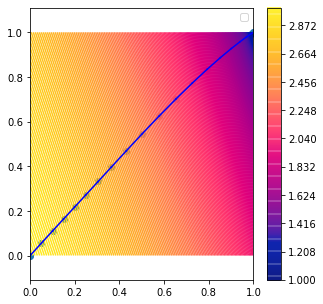

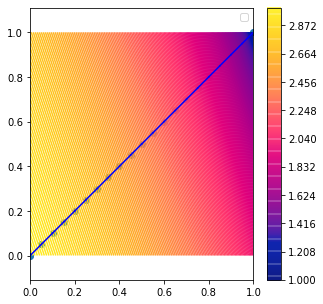

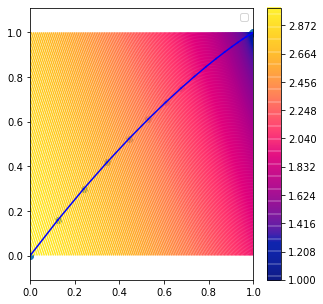

In [254]:
#question 3

n = 20

maxIter = 1000
alpha0 = 1
beta = 0.8
tol = 1e-12

#this is for number 3 now: 
init_r=np.array([np.linspace(0,1,n+1), np.linspace(0,1,n+1)]).T
X=init_r.reshape(n+1,2)
#Y = np.random.randn(n, 2)

X[0][0] = 0
X[0][1] = 0
X[n][0] = 1
X[n][1] = 1
print(X)

#Steepest descent
descent, F_vec_SD, i_SD = SteepDesc_quad(X,n)
print(descent)
graph_it(descent) 

#SR1
sr1, F_vec_sr1, i_sr1 = sr1_quad(X,n)
graph_it(sr1) 

#BFGS
bfgs, F_vec_bfgs, i_bfgs = bfgs_quad(X,n)
graph_it(bfgs) 

In [262]:
#question 4

#let's use gradient descent to map the relationship 

def min_value_GD(n):
    '''
    function which takes n and computes the minimum value of GD at that n 
    '''
    maxIter = 1000
    alpha0 = 1
    beta = 0.8
    tol = 1e-12

    init_r=np.array([np.linspace(0,1,n+1), np.linspace(0,1,n+1)]).T
    X=init_r.reshape(n+1,2)
    X[0][0] = 0
    X[0][1] = 0
    X[n][0] = 1
    X[n][1] = 1
    #Steepest descent
    descent_SD_4,F_vec_SD_4,iter_SD_4 = SteepDesc_quad(X,n)
    minimizing_value = quadrature(descent_SD_4)
    return minimizing_value 

#compute minimizing value for all n 
#n = 5, 10, 20, 40, 80, 160
print('5')
f_5 = min_value_GD(5)
print('10')
f_10 = min_value_GD(10)
print('20')
f_20 = min_value_GD(20)
print('40')
f_40 = min_value_GD(40)
print('80')
f_80 = min_value_GD(80)
print('almost')
f_160 = min_value_GD(160)
print('yooo')

difference = [abs(f_10-f_5),abs(f_20-f_10),abs(f_40-f_20),abs(f_80-f_40),abs(f_160-f_80),0]

plt.figure(figsize = (5,5))
plt.loglog([5,10,20,40,80,160],difference,c = "#6400ff")
plt.title('Difference of minimizing value vs m')
plt.xlabel("m")
plt.ylabel("Difference")


5
10
20
40
80


KeyboardInterrupt: 

[[0.  0. ]
 [0.2 0.2]
 [0.4 0.4]
 [0.6 0.6]
 [0.8 0.8]
 [1.  1. ]]


Text(0, 0.5, 'Step Size ')

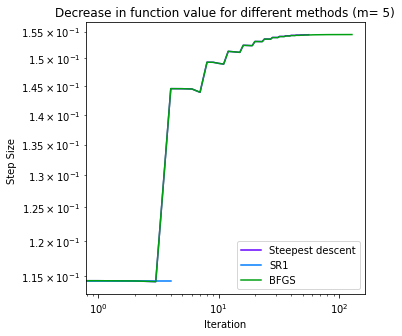

In [260]:
#question 5 
#the plot have to have to return [steps for methods] and F_vec in a []
n = 5

maxIter = 1000
alpha0 = 1
beta = 0.8
tol = 1e-12

init_r=np.array([np.linspace(0,1,n+1), np.linspace(0,1,n+1)]).T
X=init_r.reshape(n+1,2)

X[0][0] = 0
X[0][1] = 0
X[n][0] = 1
X[n][1] = 1
print(X)

descent_SD,F_vec_SD,iter_SD = SteepDesc_quad(X,n)
descent_sr1,F_vec_sr1,iter_sr1 = sr1_quad(X,n)
descent_bfgs,F_vec_bfgs,iter_bfgs = bfgs_quad(X,n)


#plot it for m = n
plt.figure(figsize = (5, 5))
plt.loglog(range(0, iter_SD+1), F_vec_SD, 
           c = "#6400ff", label = "Steepest descent")
plt.loglog(range(0, iter_sr1+1), F_vec_sr1, 
           c = "#007cff", label = "SR1")
plt.loglog(range(0, iter_bfgs+1), F_vec_bfgs, 
           c = "#00a013", label = "BFGS")
plt.legend()
plt.title("Decrease in function value for different methods (m=5)")
plt.xlabel("Iteration")
plt.ylabel("Step Size ")
